**parsing the data and making plots with it**

so far I havent put any fitting on this, its just how I'm getting the data in coutns per second from the ascii files

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy

In [35]:
def file_parser(filename):
    IS_DATA = False

    #the function will fill and return these dictionaries:
    header_dict = {
        "Keys": [],
        "Key Info": []
    }

    spectrum_dict = {
        "bins": [], 
        "counts": []
    }

    with open(filename, "r") as file:
        for line in file:
            line = line.strip()

        # if it's data, reset the flag
            if line == '$DATA:':
                IS_DATA = True
                continue
            elif line.startswith('$'):
                header_dict["Keys"].append(line)
                next_line = next(file).strip()
                header_dict["Key Info"].append(next_line)
                IS_DATA = False

        #this is for all lines following # DATA
        #while IS_DATA == True:  
            if IS_DATA == True:
                try:
                    spectrum_dict["counts"].append(float(line))
                    #w, f = list(map(float, line.split(',')))
                    #spectrum_dict["Wavelength"].append(float(w))
                    #spectrum_dict["Flux"].append(float(f))
                except ValueError:
                    continue   
    #change if bin range changes
    for i in range(1024):
        spectrum_dict["bins"].append(i)
        
    return header_dict, spectrum_dict

In [36]:
header_dict, spectrum_dict = file_parser("experimental_NaI/Ba_0degree.Spe")

In [37]:
 spectrum_dict["bins"][-1]

1023

In [38]:
header_dict

{'Keys': ['$SPEC_ID:',
  '$SPEC_REM:',
  '$DATE_MEA:',
  '$MEAS_TIM:',
  '$ROI:',
  '$PRESETS:',
  '$ENER_FIT:',
  '$MCA_CAL:',
  '$SHAPE_CAL:'],
 'Key Info': ['No sample description was entered.',
  'DET# 1',
  '10/21/2025 12:07:42',
  '195 195',
  '0',
  'None',
  '-10.130505 2.230151',
  '3',
  '3']}

In [39]:
len( spectrum_dict["counts"])

1024

In [40]:
spectrum_dict["counts"][1020:]

[0.0, 0.0, 1.0, 0.0]

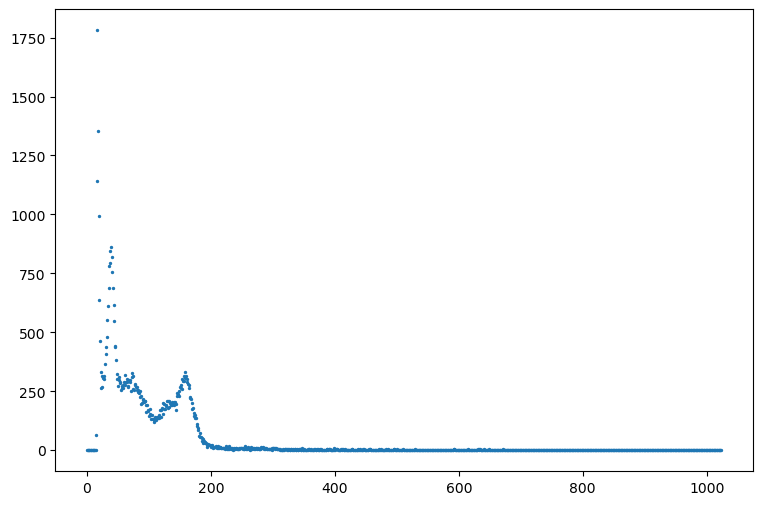

In [45]:
fig, ax = plt.subplots(figsize = (9, 6))
ax.scatter(spectrum_dict["bins"], spectrum_dict["counts"], s = 2)

In [46]:
background_header, background_spectrum = file_parser("experimental_NaI/Buffer_Data.Spe")

In [51]:
background_header

{'Keys': ['$SPEC_ID:',
  '$SPEC_REM:',
  '$DATE_MEA:',
  '$MEAS_TIM:',
  '$ROI:',
  '$PRESETS:',
  '$ENER_FIT:',
  '$MCA_CAL:',
  '$SHAPE_CAL:'],
 'Key Info': ['No sample description was entered.',
  'DET# 1',
  '10/21/2025 12:28:00',
  '136 136',
  '0',
  'None',
  '-10.130505 2.230151',
  '3',
  '3']}

In [57]:
#grabbing the count time from the header info

background_counttime = background_header["Key Info"][3].split(" ")
ba_counttime = header_dict["Key Info"][3].split(" ")

float(ba_counttime[0])

195.0

In [58]:
ba_ct = float(ba_counttime[0])
background_ct = float(background_counttime[0])

In [62]:
 np.array(background_spectrum["counts"])

array([0., 0., 0., ..., 0., 0., 0.])

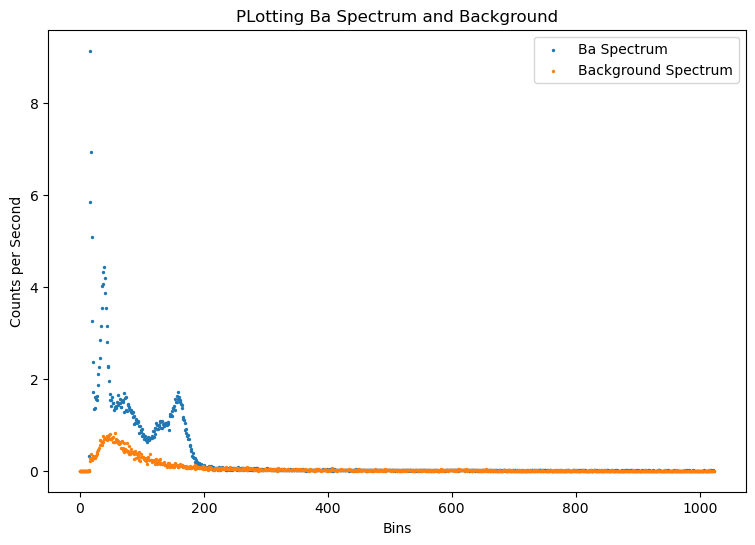

In [63]:
fig, ax = plt.subplots(figsize = (9, 6))
ax.set_title("PLotting Ba Spectrum and Background")
ax.set_xlabel("Bins")
ax.set_ylabel("Counts per Second")
ax.scatter(spectrum_dict["bins"], np.array(spectrum_dict["counts"]) / ba_ct, s = 2, label = ("Ba Spectrum"))

ax.scatter(background_spectrum["bins"], np.array(background_spectrum["counts"]) / background_ct, s = 2, label = ("Background Spectrum"))
ax.legend()

plt.show()

In [65]:
ba_background_subtracted = (np.array(spectrum_dict["counts"]) / ba_ct) - ( np.array(background_spectrum["counts"]) / background_ct)

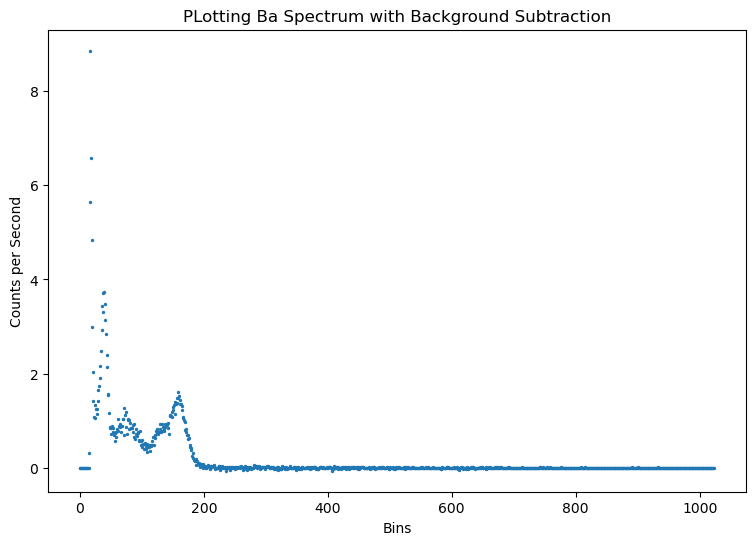

In [66]:
fig, ax = plt.subplots(figsize = (9, 6))
ax.set_title("PLotting Ba Spectrum with Background Subtraction")
ax.set_xlabel("Bins")
ax.set_ylabel("Counts per Second")
ax.scatter(spectrum_dict["bins"], ba_background_subtracted, s = 2, label = ("Ba Spectrum background sub"))

plt.show()